In [ ]:
!pip install torch
!pip install segmentation-models-pytorch==0.1.3
!pip install albumentations==0.5.2

     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 245kB 33.9MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp37-none-any.whl size=12420 sha256=827f54bed7dcd43296ddf633397dfd1c591e21ddec9c03d765a3e1c4cde3e7a0
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60963 sha256=a7fa979311ea22c01305028e34b6e2cb2e68306dd652f3a7e7bd8e10eb66be3d
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built efficientnet-pytorch pretrainedmodels
     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 952kB 6.1MB/s 
     |████████████████████████████████| 37.6MB 103kB/s 
  Found existing installation: imgaug 0.2.9
    Un

In [ ]:
import matplotlib.pyplot as plt

# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(20, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [ ]:
from urllib.request import urlopen
from PIL import Image
import torchvision.transforms as transforms
from skimage.transform import resize

transform = transforms.Compose([
    transforms.Resize((240,240)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

images = ['https://www.producemarketguide.com/sites/default/files/Commodities.tar/Commodities/lemon_commodity-page.png',
          'https://live.staticflickr.com/4012/4337615778_0e3a9a0d1f_z.jpg',
          'https://live.staticflickr.com/3703/12950385095_7fc0448ba8_c_d.jpg',
          'https://live.staticflickr.com/3694/12144947194_5cb804da9e_c_d.jpg',
          'https://cdn.britannica.com/84/188484-050-F27B0049/lemons-tree.jpg',
          'https://i.pinimg.com/originals/d1/49/b2/d149b230d96a99cbbf1ad48b25ec318e.jpg',
          'https://thumbs.dreamstime.com/b/lemon-hand-fresh-isolated-white-background-38314688.jpg',
          'https://re-how.net/wp-content/uploads/2021/01/d15357-587-382359-2.jpg',
          'https://www.hiroshima-kankou.com/image/rendering/feature_page_image/32/trim.1160/1160/590?v=1344b01af58d364c64d51a41a93c1a7a861a5837',
          'https://8chobori.jp/wp-content/uploads/2019/07/timeline_20190627_030553-705x756.jpg',
          'https://lemonsour-lab.com/wp-content/uploads/2020/05/3057345_m-1-1024x769.jpg',
          'https://shop.perfumersapprentice.com/images/Product/medium/7390.jpg']

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth


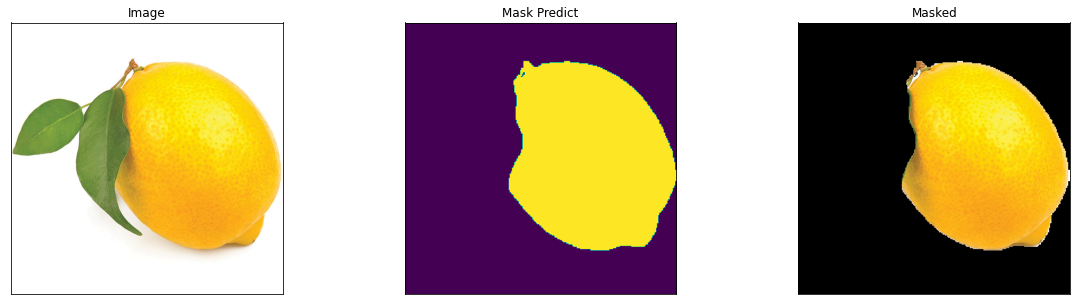

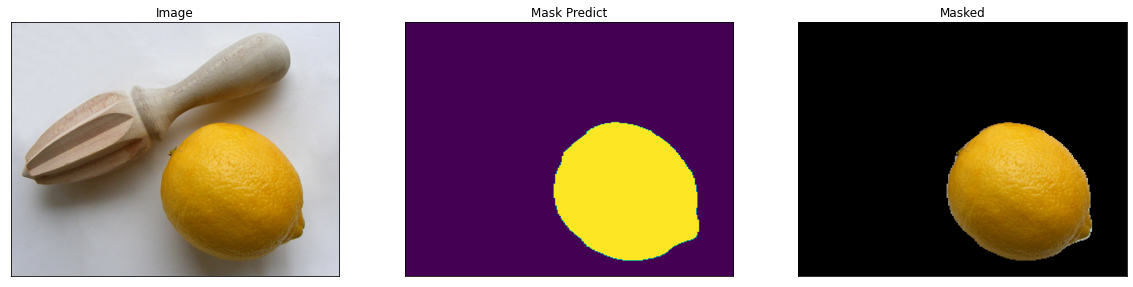

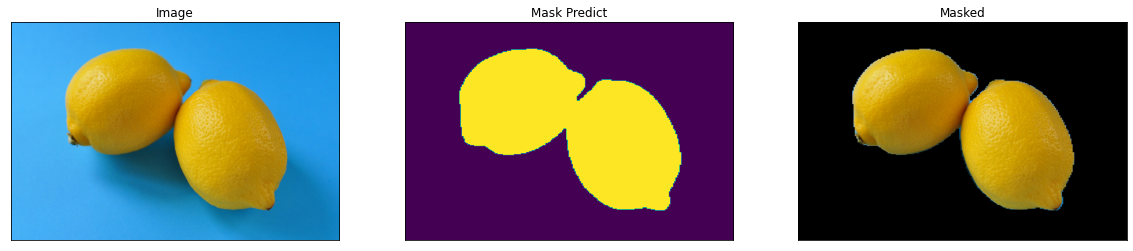

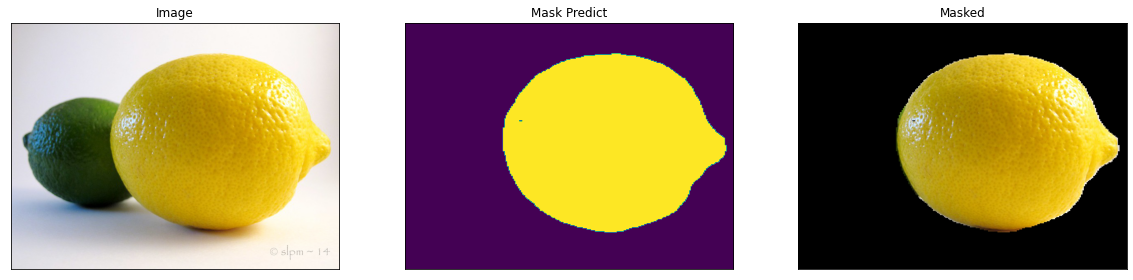

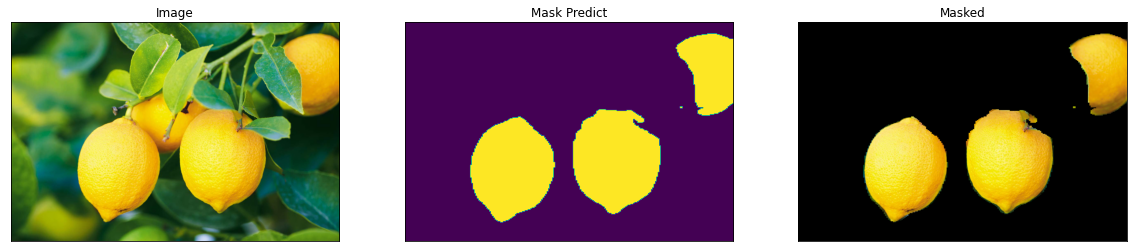

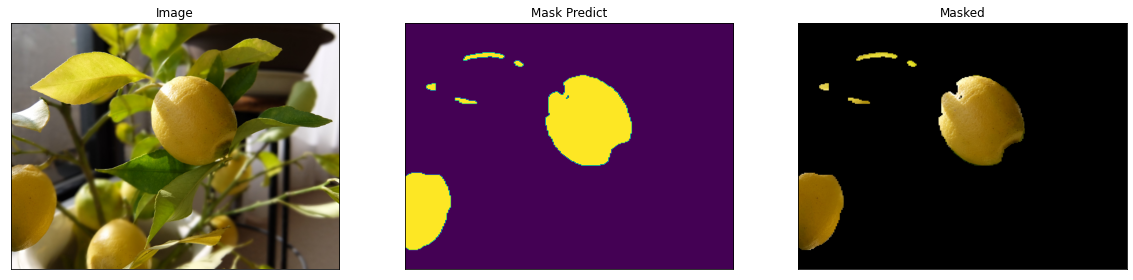

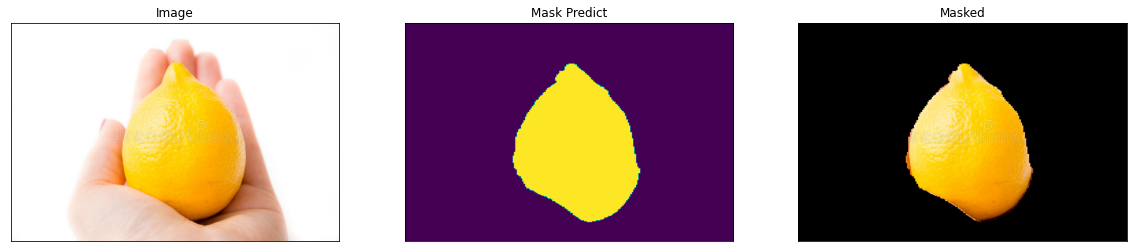

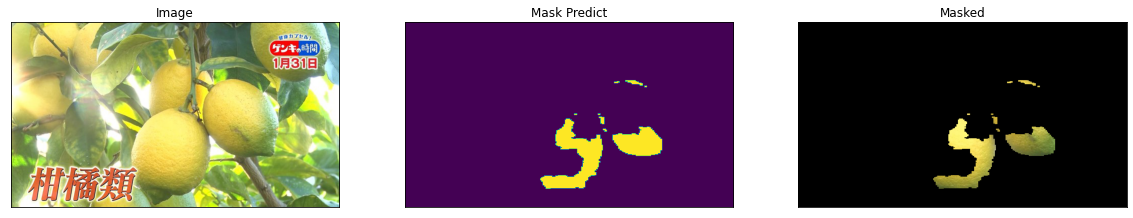

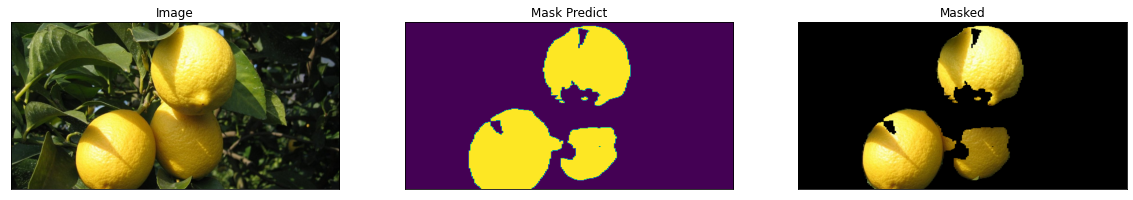

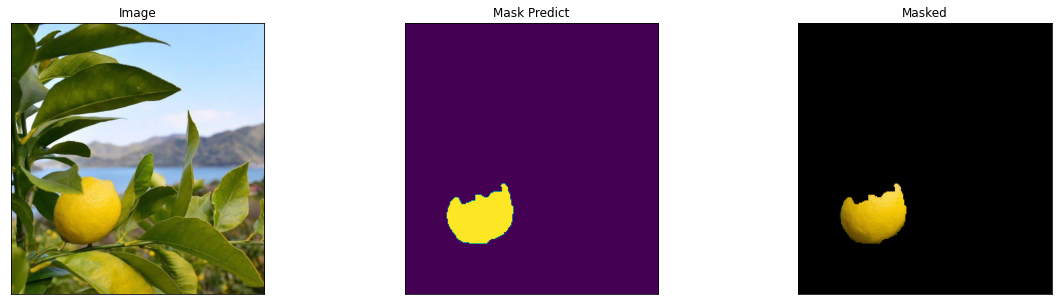

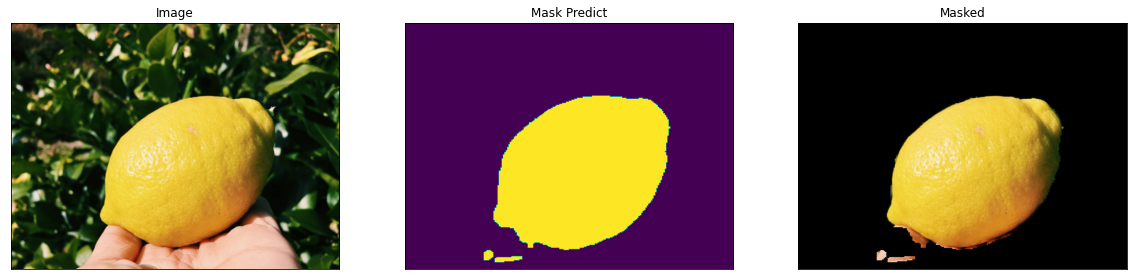

Missing: https://shop.perfumersapprentice.com/images/Product/medium/7390.jpg


In [ ]:
import segmentation_models_pytorch as smp
from shutil import copyfile
import torch
from collections import defaultdict

use_cuda = torch.cuda.is_available()
DEVICE = torch.device('cuda' if use_cuda else 'cpu')

model_type = 'UnetPlusPlus'
#model_type = 'Linknet'
#model_type = 'FPN'
#model_type = 'PSPNet'

extra = defaultdict(dict)
extra['UnetPlusPlus'] = dict(decoder_attention_type = None,
  decoder_use_batchnorm = True,
  decoder_channels=(128, 64, 32, 16),
  encoder_depth=4)

model = getattr(smp, model_type)(
    encoder_name="efficientnet-b1",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1,
    activation='sigmoid',
    **extra[model_type]
)

model.to(DEVICE)

#filename = 'unetplusplus_efficientnet_b1_20210223111032.pt'
#filename = 'unetplusplus_efficientnet_b1_20210225165226.pt'
#filename = 'unetplusplus_efficientnet_b1_20210226120539.pt'
#filename = 'unetplusplus_efficientnet_b1_20210226131254.pt'
#filename = 'unetplusplus_efficientnet_b1_20210226140621.pt'
#filename = 'unetplusplus_efficientnet_b1_20210226151451.pt'
#filename = 'unetplusplus_efficientnet_b1_20210227061402.pt'
#filename = 'unetplusplus_efficientnet_b1_20210227062437_6.pt'
#filename = 'unetplusplus_efficientnet_b1_20210228012355_8.pt'
#filename = 'unetplusplus_efficientnet_b1_20210228022008_11.pt'
filename = 'unetplusplus_efficientnet_b1_20210228032202_8.pt' # Best for UNetPlusPlus
#filename = 'pspnet_efficientnet_b1_20210228042756_15.pt'

copyfile(f'drive/MyDrive/Colab Notebooks/SIGNATEHiroshimaLemon/models/{filename}',filename)
model.load_state_dict(torch.load(filename,map_location=DEVICE))
model.eval()


for image in images:
  
  try:
    image = Image.open(urlopen(image))
  except Exception:
    print(f'Missing: {image}')
    continue

  image_input = transform(image).unsqueeze(0).to(DEVICE)
  mask_predict = model(image_input)
  mask_predict = mask_predict.detach().squeeze().cpu().numpy().round()
  mask_predict = resize(mask_predict, (image.size[1],image.size[0])).astype('bool')

  visualize(image=image,mask_predict=mask_predict, masked=image*mask_predict[:,:,None])

# The code below opens training achieve and finds images which model could not predict with reasonable dice loss, and saves the masks for manually corrections

In [ ]:
from shutil import copyfile, unpack_archive
copyfile('drive/MyDrive/Colab Notebooks/SIGNATEHiroshimaLemon/data/archive_mask.hdf5','archive_mask.hdf5')

import os
import re

import h5py
import numpy as np
import torch.utils.data
from PIL import Image
import cv2
from random import choice, random
import albumentations as A

import logging
import os
logger = logging.getLogger()
logger.setLevel(os.environ.get("LOGLEVEL", "INFO"))

class HiroshimaLemonMask(torch.utils.data.Dataset):
    """HiroshimaLemon dataset."""

    def __init__(self, data='archive.hdf5', images='imagenet', image_probablity=0.75, empty_probablity=0.25, original=True, in_memory=True):
        assert os.path.exists(data), "Data path '{}' not found".format(data)
        self._data = data
        if images is not None:
          self._images = [images+'/'+i for i in os.listdir(images) if i[-4:] == '.jpg']
          self._image_probablity = image_probablity
          self._empty_probablity = empty_probablity
        else:
          self._images = None
        self._size = 0
        assert in_memory, "Only in_memory implemented"
        self._in_memory = in_memory
        if self._in_memory:
          self._construct_imdb()
        self._transform_background = A.Compose([
            A.Rotate(border_mode=cv2.BORDER_REFLECT_101,always_apply=True),
            A.RandomResizedCrop(width=640, height=640, scale=(0.2,4.0), interpolation=cv2.INTER_AREA,always_apply=True),
            A.HorizontalFlip(p=0.5),
            A.ElasticTransform(p=0.2),
            A.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4,always_apply=True),
            A.GaussianBlur(blur_limit=(1,5), p=0.2)
        ])
        self._original = original
        if not original:
          self._transform = A.Compose([
              A.Rotate(border_mode=cv2.BORDER_REFLECT_101,always_apply=True),
              A.RandomResizedCrop(width=240, height=240, scale=(0.8,2.0), interpolation=cv2.INTER_AREA,always_apply=True),
              A.HorizontalFlip(p=0.5),
              A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.02, hue=0.01,always_apply=True),
              A.CoarseDropout(max_holes=1, max_height=150, max_width=150, min_holes=1, min_height=50, min_width=50, fill_value=0, mask_fill_value=0, p=0.2),
              A.Rotate(border_mode=cv2.BORDER_REFLECT_101,always_apply=True),
              A.GridDistortion(distort_limit=0.1,p=0.5),
              A.ISONoise(p=0.2),
              A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
              A.GaussianBlur(blur_limit=(1,5), p=0.2)
          ])
        self._transform = A.Compose([
            A.Resize(width=240, height=240, interpolation=cv2.INTER_AREA,always_apply=True),
            A.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225)),
        ])

    def _construct_imdb(self):
        """Constructs the imdb."""
        with h5py.File(self._data,'r') as hf:
          self._imdb = (hf['im'][()],hf['mask'][()])
          size = self._imdb[0].shape[0]
          logger.info("Number of images: {}".format(size))
          self._size = size

    def __getitem__(self, index):
        assert index >= 0 and index < self._size, \
            "Provided index {} must be in range [0, {}).".format(index, self._size)
        mask = self._imdb[1][index,:,:]
        image = self._imdb[0][index,:,:,:].copy()
        if self._images is not None:
          if random() < self._image_probablity:
            background = self._transform_background(image=np.asarray(Image.open(choice(self._images))))['image']
            image[~mask] = background[~mask]
            if random() < self._empty_probablity:
              image = background
              mask = mask * 0
        transformed = self._transform(image=image,mask=mask.astype('uint8'))
        return transformed['image'].transpose(2, 0, 1).astype('float32'), np.expand_dims(transformed['mask'], axis=0).astype('float32')

    def __len__(self):
        return self._size

dataset = HiroshimaLemonMask('archive_mask.hdf5', images=None, original=True)


def dice_loss(inputs, targets, smooth=1):
      #flatten label and prediction tensors
      inputs = inputs.flatten()
      targets = targets.flatten()
      
      intersection = (inputs * targets).sum()                            
      dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
      
      return 1 - dice

In [ ]:
from tqdm import tqdm

result = []

for i in tqdm(range(len(dataset))):
  image_input, mask = dataset[i]

  mask_predict = model(torch.from_numpy(image_input).unsqueeze(0))
  mask_predict = mask_predict.detach().squeeze().cpu().numpy().round()

  loss = dice_loss(mask, mask_predict)

  result.append((i,loss, mask_predict))

100%|██████████| 2753/2753 [16:34<00:00,  2.77it/s]


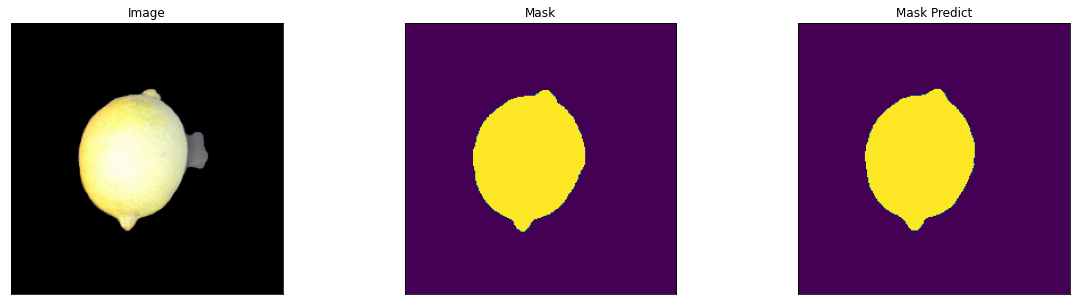

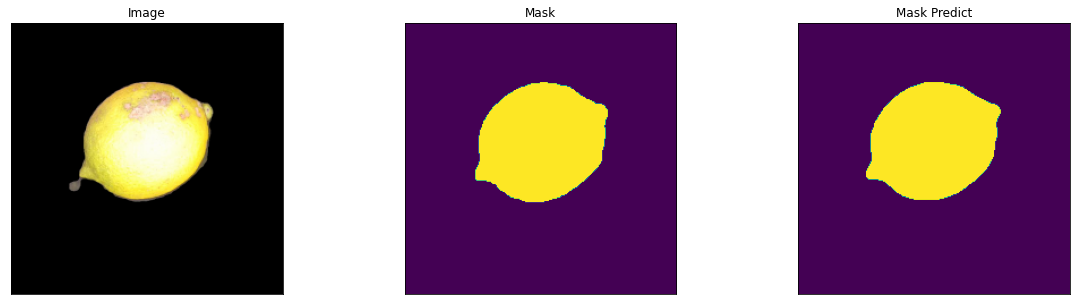

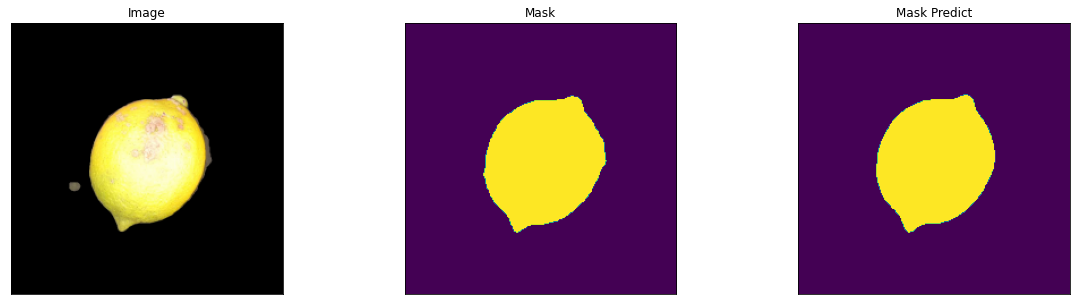

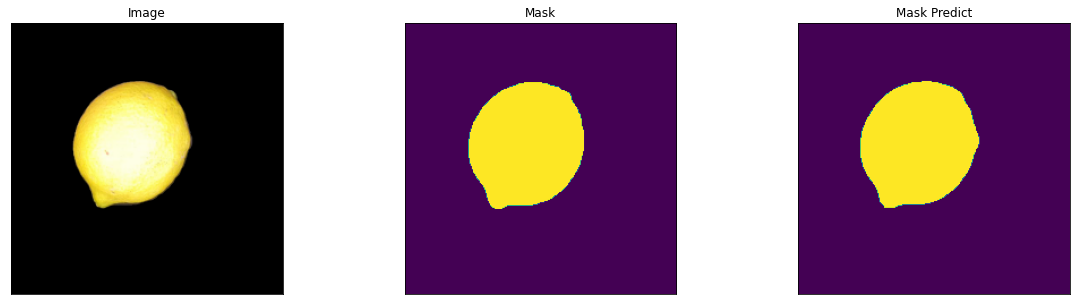

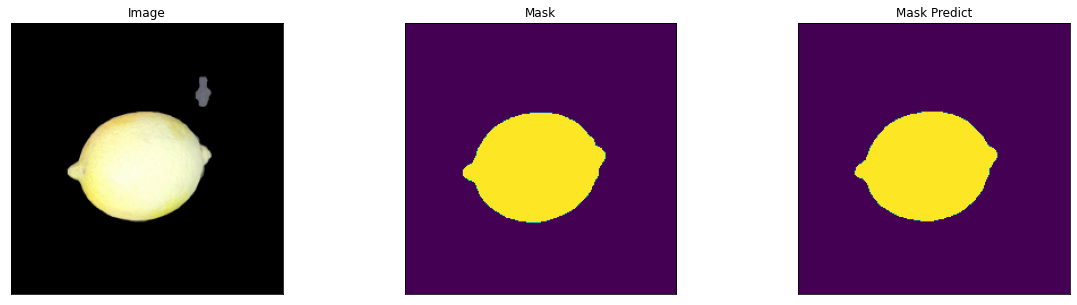

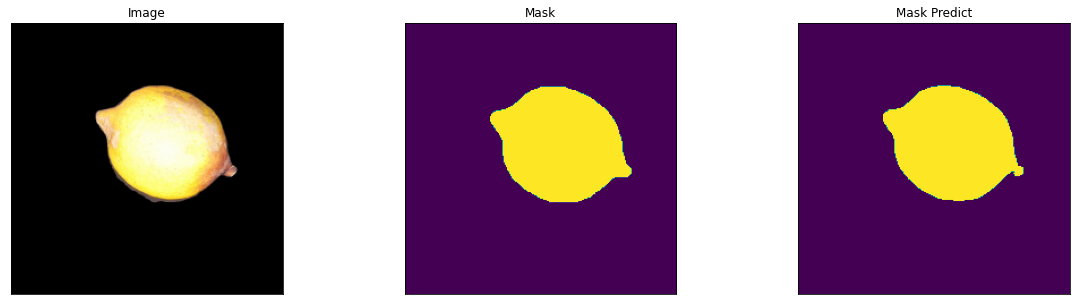

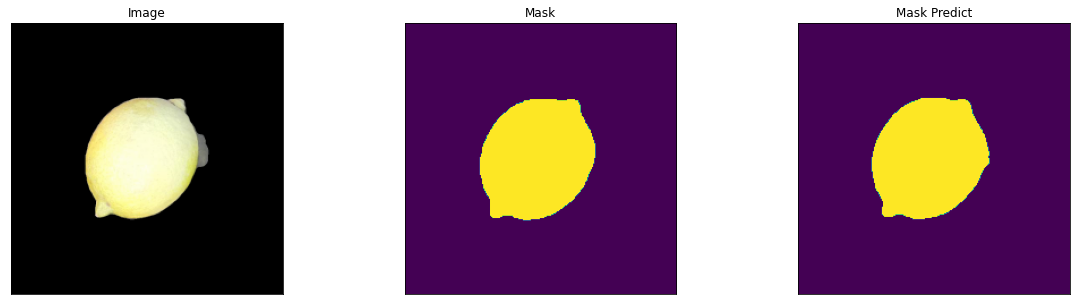

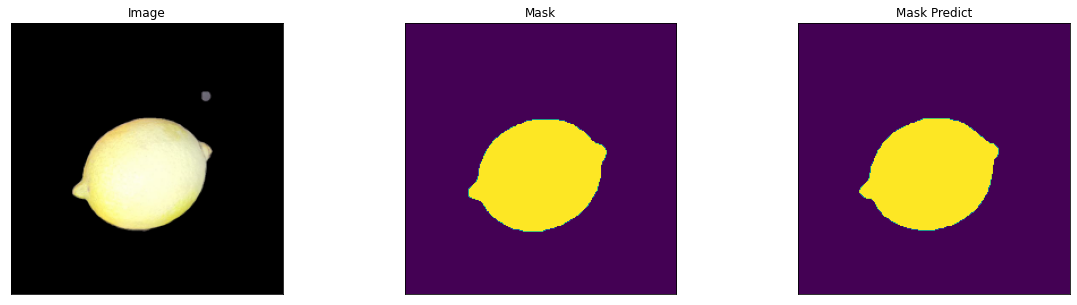

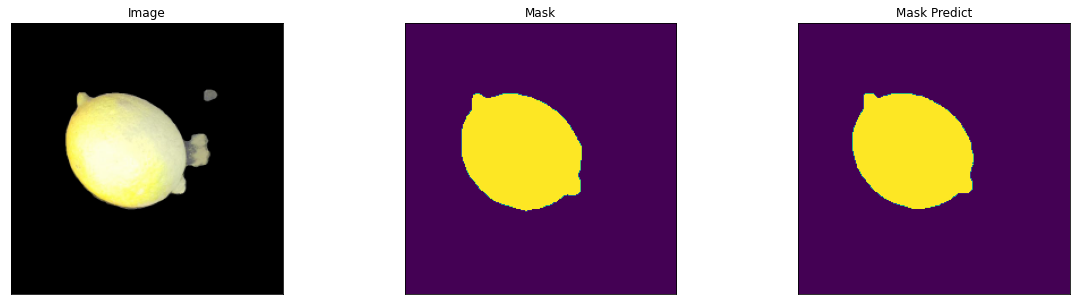

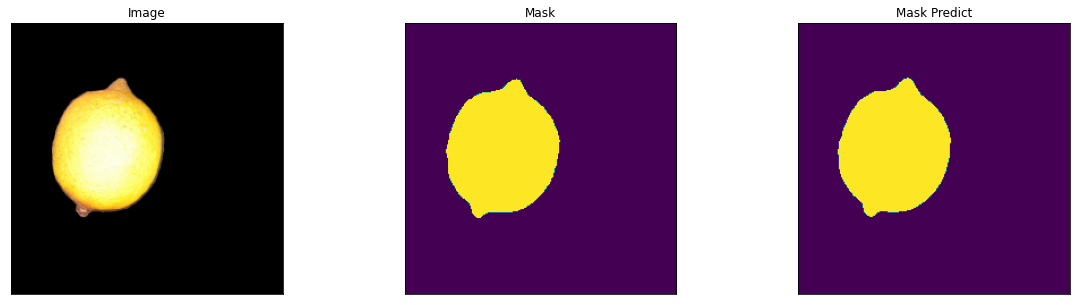

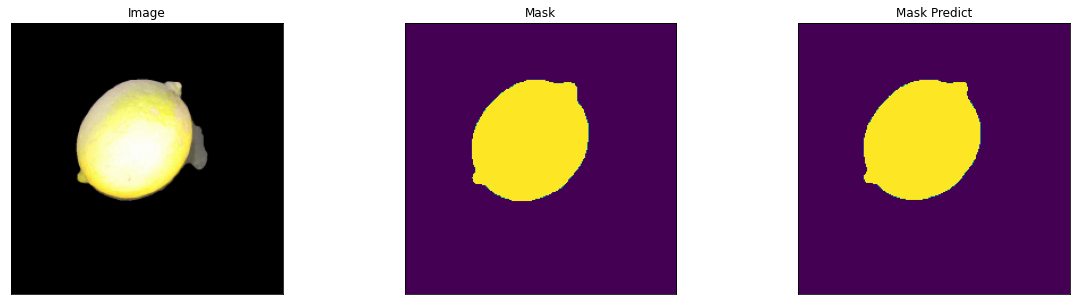

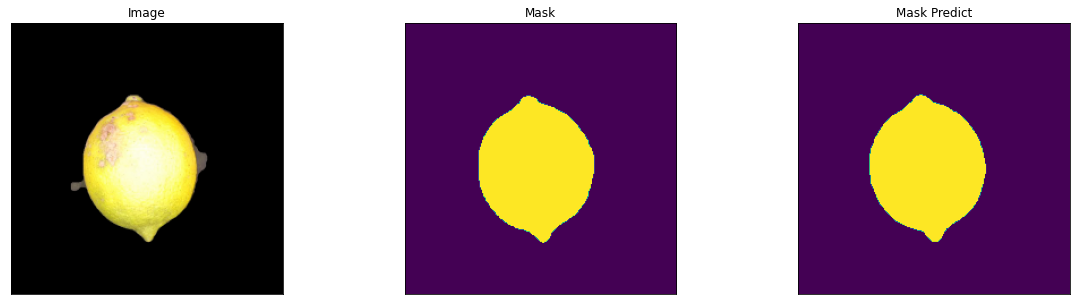

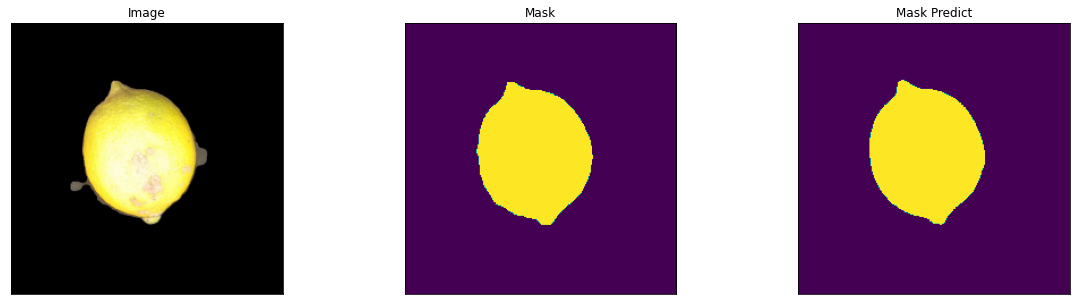

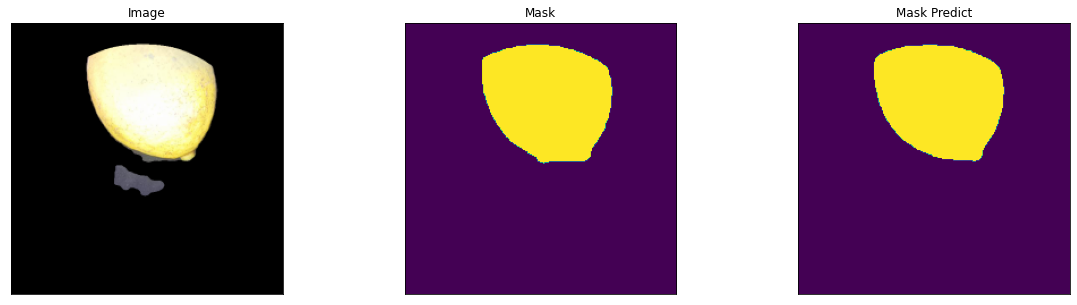

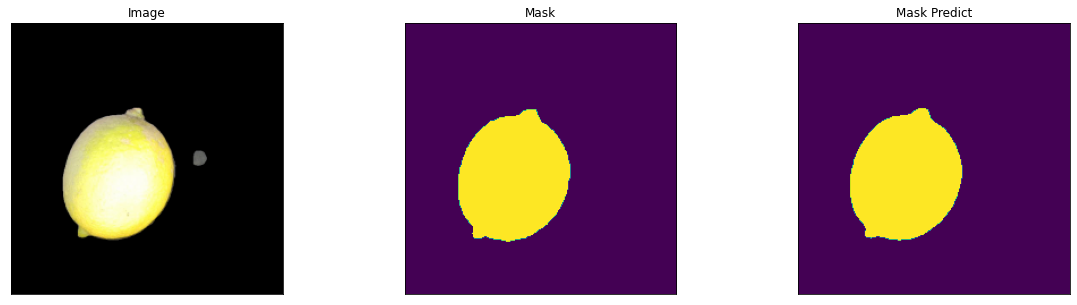

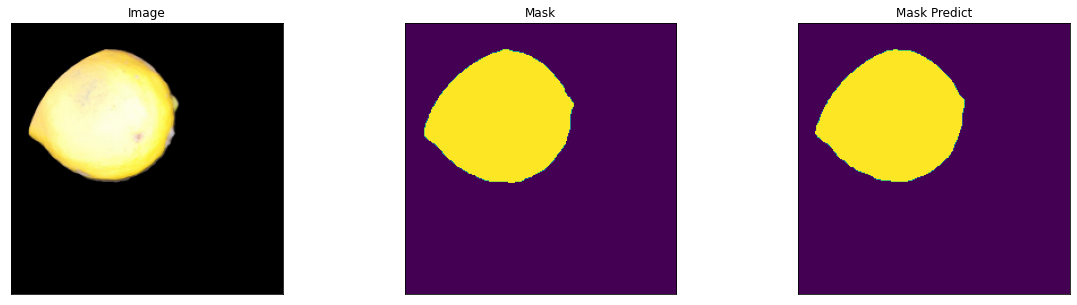

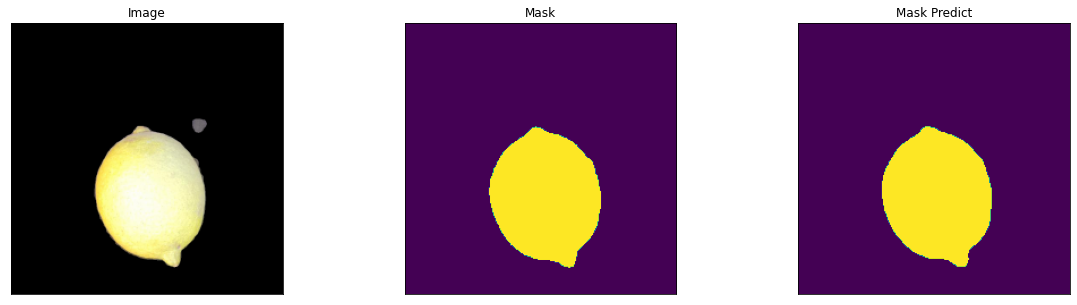

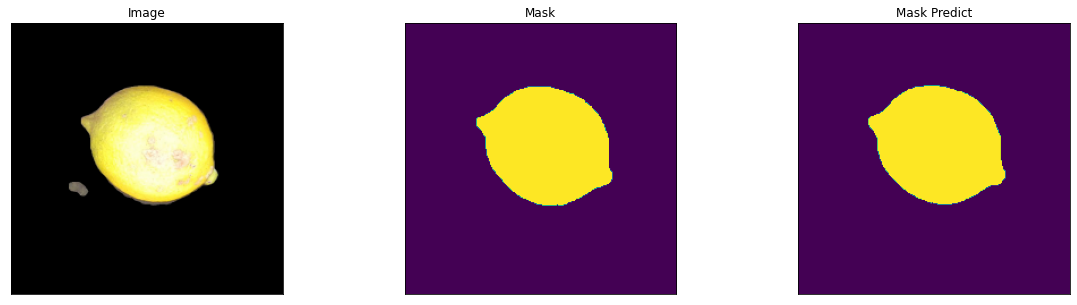

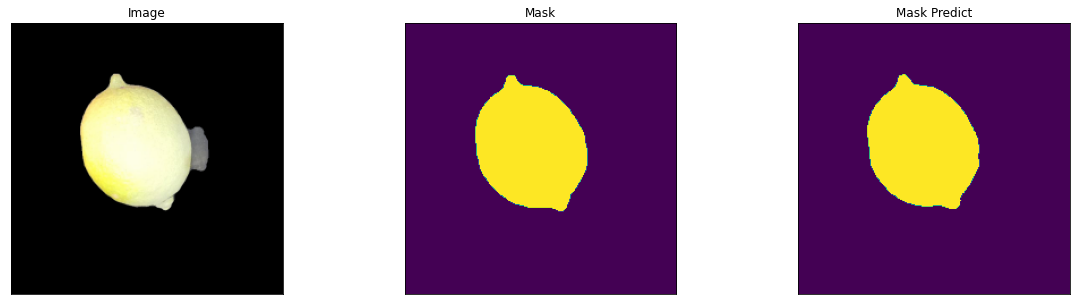

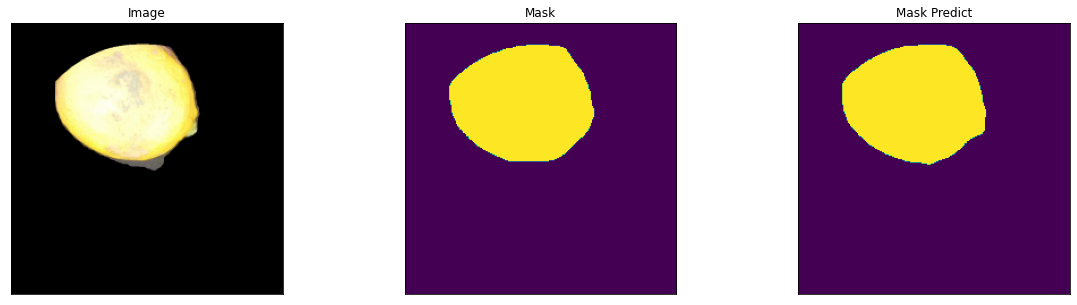

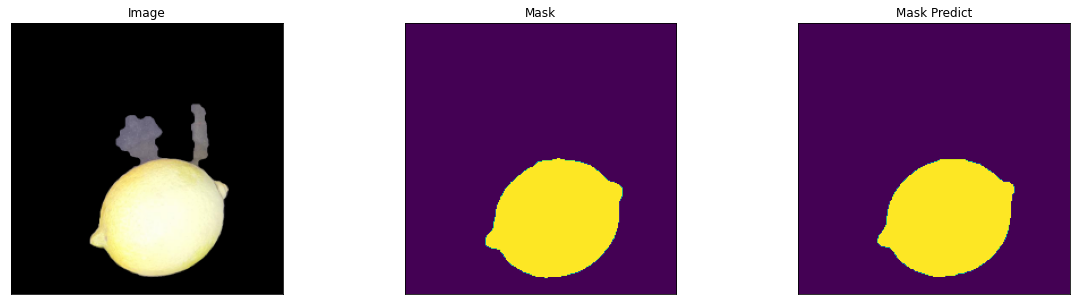

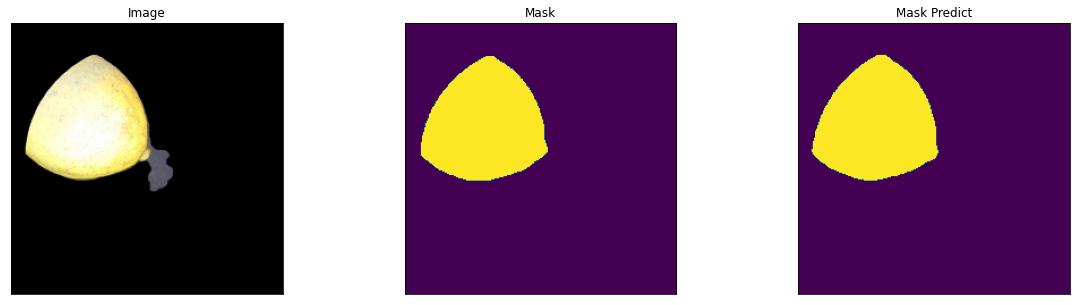

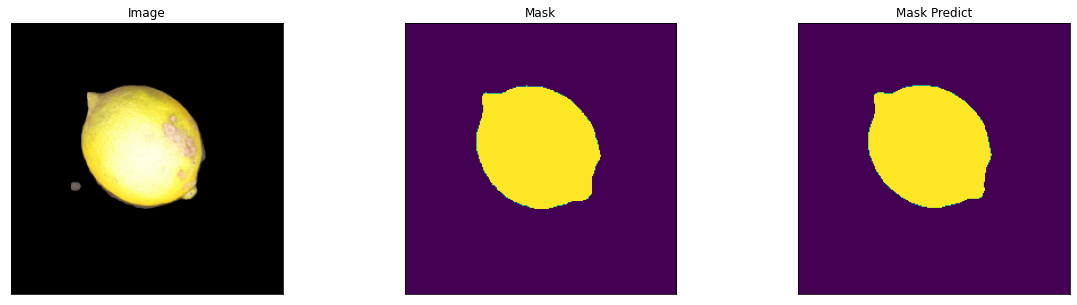

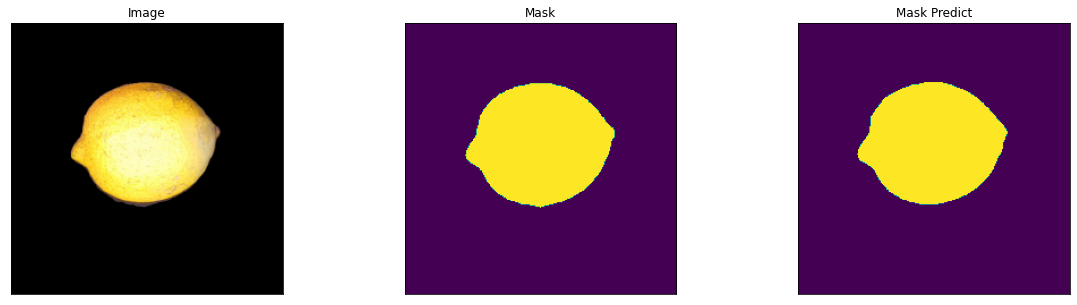

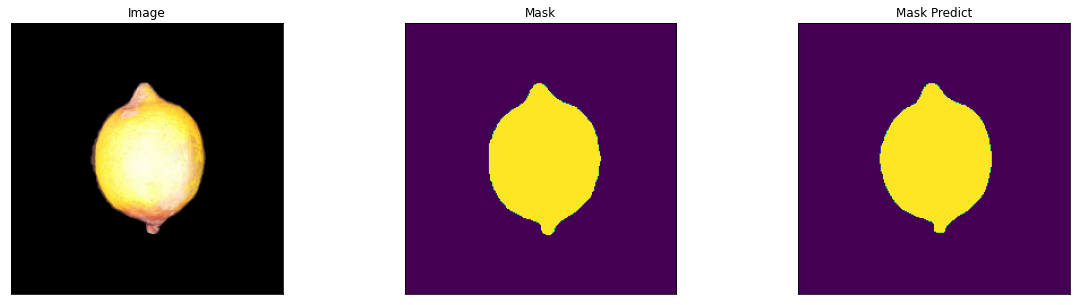

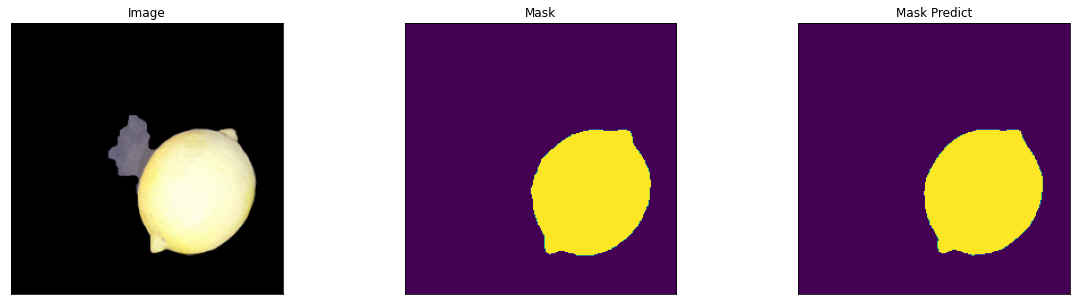

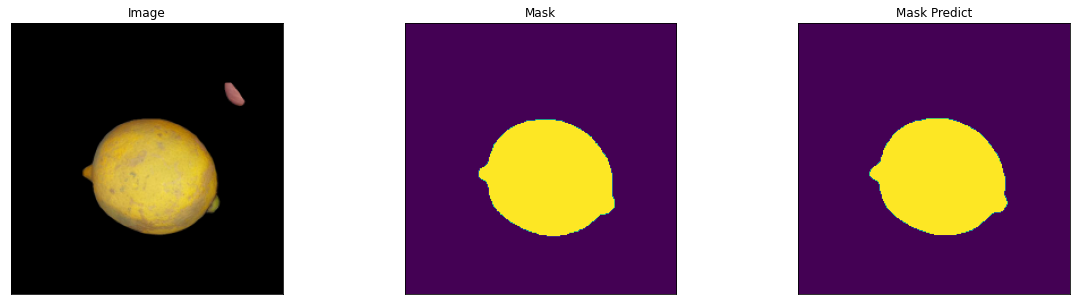

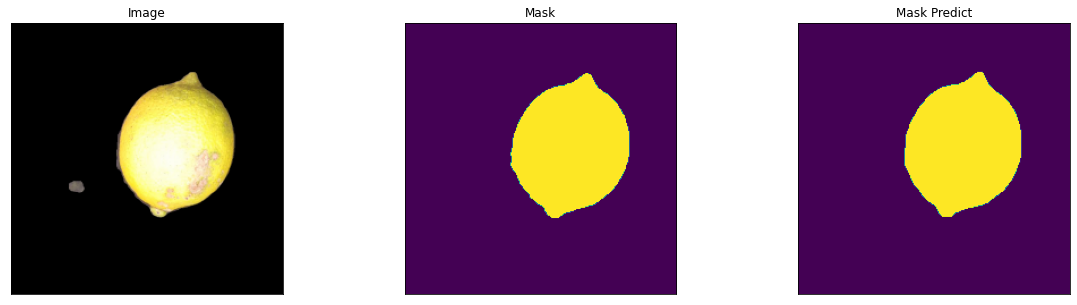

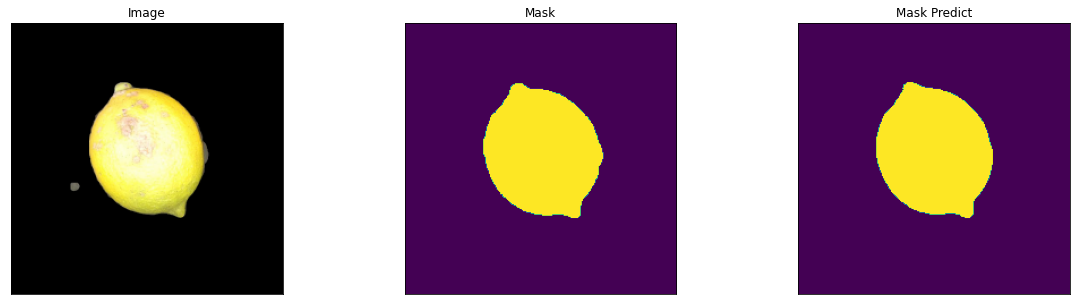

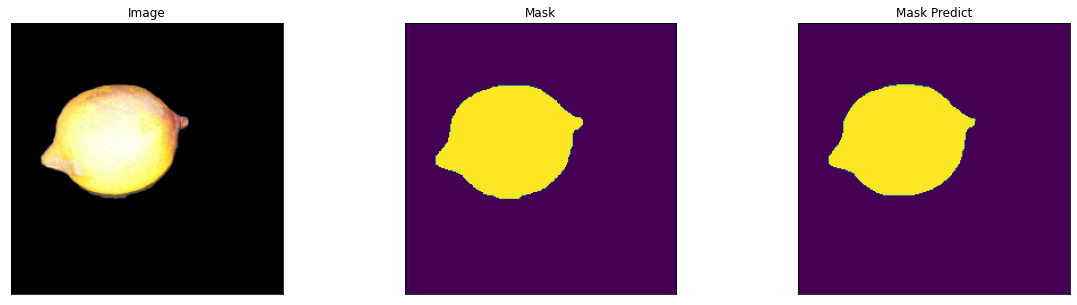

In [ ]:
result = sorted(result, key = lambda x: x[1])

for i, loss, mask_predict in result[::-1][:30]:

    image_input, mask = dataset[i]

    image_input = image_input * np.array([0.229, 0.224, 0.225])[:,None,None] + np.array([0.485, 0.456, 0.406])[:,None,None]
    image_input = np.clip(image_input, 0, 1)
    image_input = image_input.transpose(1,2,0)
    image_input = (image_input * 255.0).astype(np.uint8)

    visualize(image=image_input,mask=mask.squeeze(0),mask_predict=mask_predict)

    """
    rescaled_mask = (255.0 / mask.max() * (mask - mask.min())).astype(np.uint8)

    im = Image.fromarray(rescaled_mask.squeeze(0), 'L')
    im.save(f'drive/MyDrive/Colab Notebooks/SIGNATEHiroshimaLemon/data/fix/mask/{i}.png')

    im = Image.fromarray(image_input)
    im.save(f'drive/MyDrive/Colab Notebooks/SIGNATEHiroshimaLemon/data/fix/image/{i}.png')
    """